# Example tomographyanalysis with Qlab.jl

In [1]:
using Qlab

┌ Info: Precompiling Qlab [bd484506-bbca-5401-99e8-0a3b5ec6398e]
└ @ Base loading.jl:1260
┌ Info: Skipping precompilation since __precompile__(false). Importing Qlab [bd484506-bbca-5401-99e8-0a3b5ec6398e].
└ @ Base loading.jl:1033
┌ Info: Precompiling QuantumTomography [1d9c40fe-1d26-11ea-03f8-f5801c7a1696]
└ @ Base loading.jl:1260
┌ Info: Skipping precompilation since __precompile__(false). Importing QuantumTomography [1d9c40fe-1d26-11ea-03f8-f5801c7a1696].
└ @ Base loading.jl:1033


In [9]:
using Statistics, LinearAlgebra

In [4]:
DATAPATH = "/Users/mware/IpythonNotebooks/explorations/Tomography/";
DATE = "200428";

In [11]:
data, desc = load_data(DATAPATH,18,DATE,load_var=true);
data["q2-main"]["variance"] = var(data["q2-rr"]["data"], dims=2);

┌ Warning: Variance not available for dataset: q2-main
└ @ Qlab /Users/mware/.julia/environments/v1.4/dev/Qlab/src/load_data.jl:46
┌ Warning: Variance not available for dataset: q2-rr
└ @ Qlab /Users/mware/.julia/environments/v1.4/dev/Qlab/src/load_data.jl:46


In [12]:
tomo = Qlab.StateTomo(data,desc);

Preprocessing data
Found 1 sets of qubit data: q2 
Found 2 sets of qubit data labels: main rr 
Correlation data found... no
Variance data found for dataset: q2-main
Variance data found... no
Main data set: q2-main
Shots data set: q2-rr


┌ Warning: Assuming numCalRepeats is even!
└ @ Qlab /Users/mware/.julia/environments/v1.4/dev/Qlab/src/tomography.jl:359


In [13]:
rhoLSQ, rhoML = Qlab.analyzeStateTomo(tomo)

MLStateTomo fit return status: MaxIter


(Complex{Float64}[0.007345912174461945 - 1.2256025673069667e-18im 0.012882191803566216 - 0.043048373837762596im; 0.012882191779547239 + 0.043048373837762284im 0.9926540877591572 + 1.062633275837759e-18im], Complex{Float64}[2.873560634182644e-7 + 4.5194011387419255e-24im 0.000196447678102705 - 0.00031189528912322354im; 0.00019644767810270342 + 0.0003118952891232246im 0.9999997126439364 + 2.1954709002469032e-15im])

____

Let's plot the reconstruction.

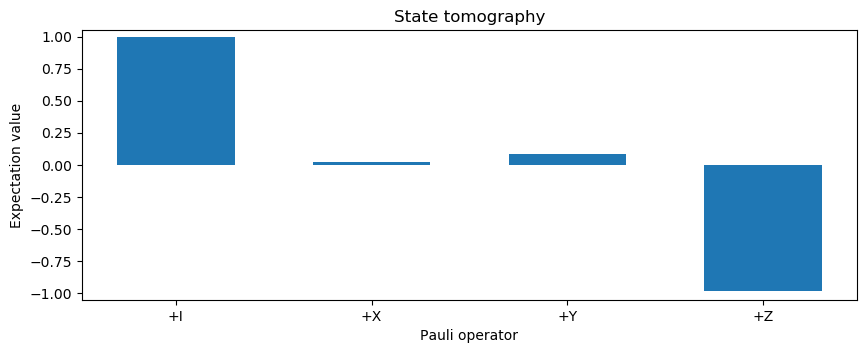

In [14]:
Qlab.pauli_set_plot(rhoLSQ)

For more informative plots we can use some nice existing libraries.  Best to not reinvent the wheel.  for this example, you'll need PyCall and Conda.jl with QuTip installed `Conda.add("Qutip")`

In [15]:
using PyCall

In [16]:
qutip = pyimport("qutip") 

PyObject <module 'qutip' from '/Users/mware/.julia/conda/3/lib/python3.6/site-packages/qutip/__init__.py'>

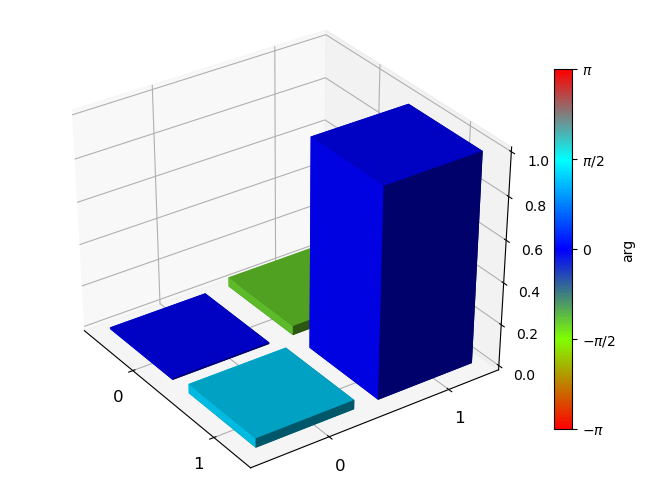

(PyPlot.Figure(PyObject <Figure size 640x480 with 2 Axes>), PyObject <mpl_toolkits.mplot3d.axes3d.Axes3D object at 0x170187a90>)

In [17]:
qutip.matrix_histogram_complex(rhoLSQ)

____

The interface will work the same for two-qubit data:

In [18]:
data, desc = load_data(DATAPATH,19,DATE,load_var=true);

┌ Warning: Variance not available for dataset: q2-rr
└ @ Qlab /Users/mware/.julia/environments/v1.4/dev/Qlab/src/load_data.jl:46
┌ Warning: Variance not available for dataset: q3-rr
└ @ Qlab /Users/mware/.julia/environments/v1.4/dev/Qlab/src/load_data.jl:46


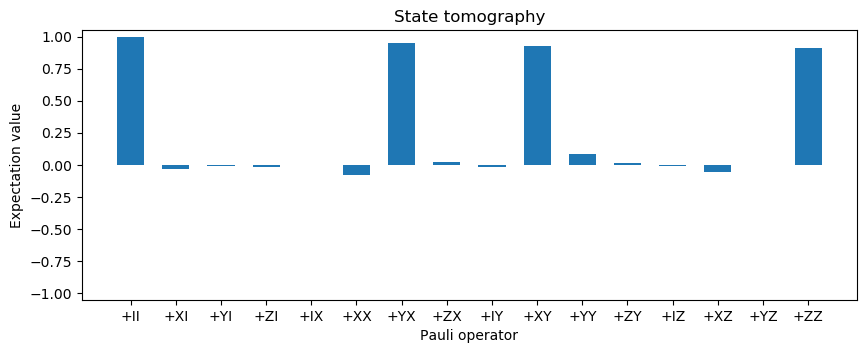

Preprocessing data
Found 2 sets of qubit data: q2 q3 
Found 2 sets of qubit data labels: main rr 
Correlation data found... ✓
Variance data found for dataset: q2-main
Variance data found... no
Variance data found... no
Variance data found for dataset: q3-main
Variance data found for dataset: correlate
Main data set: q2-main
Shots data set: q3-rr
Shots data set: q2-rr
Main data set: q3-main
Main data set: correlate


┌ Warning: Assuming numCalRepeats is even!
└ @ Qlab /Users/mware/.julia/environments/v1.4/dev/Qlab/src/tomography.jl:359


In [19]:
tomo = Qlab.StateTomo(data,desc)
rhoLSQ, rhoML = Qlab.analyzeStateTomo(tomo);
Qlab.pauli_set_plot(rhoLSQ)

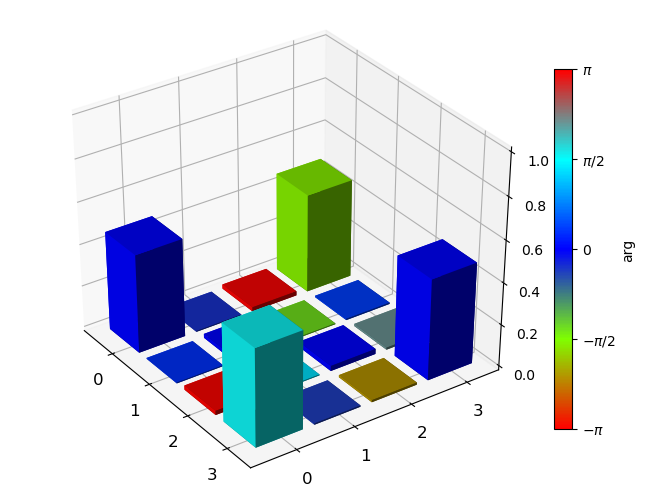

(PyPlot.Figure(PyObject <Figure size 640x480 with 2 Axes>), PyObject <mpl_toolkits.mplot3d.axes3d.Axes3D object at 0x17a4b4e48>)

In [20]:
qutip.matrix_histogram_complex(rhoLSQ)